In [1]:
import pandas as pd

from recommender.data import load_processed_ratings
from recommender.baselines import get_test_df as get_test_baselines
from recommender.recommend import recommend
from recommender.eval import hit_at_k, recall_at_k, ndcg_at_k


In [2]:
test_df = get_test_baselines()
test_df.head(), len(test_df)


(       user_id  item_id  rating  timestamp  movie_id  \
 92009      821       71       5  874793969        71   
 76631      817      597       2  874816007       597   
 86612      893      771       3  874830424       771   
 83690      933     1228       1  874939247      1228   
 63520       21      769       1  874951916       769   
 
                                       title release_date  video_release_date  \
 92009                 Lion King, The (1994)  01-Jan-1994                 NaN   
 76631                         Eraser (1996)  21-Jun-1996                 NaN   
 86612                Johnny Mnemonic (1995)  01-Jan-1995                 NaN   
 83690  Under Siege 2: Dark Territory (1995)  01-Jan-1995                 NaN   
 63520                          Congo (1995)  01-Jan-1995                 NaN   
 
                                                 IMDB_URL  unknown  ...  \
 92009  http://us.imdb.com/M/title-exact?Lion%20King,%...        0  ...   
 76631   http://us

In [3]:
def rec_random(user_id: int, k: int = 10):
    return recommend(user_id, k=k, model="random")

def rec_popularity(user_id: int, k: int = 10):
    return recommend(user_id, k=k, model="popularity")

def rec_svd(user_id: int, k: int = 10):
    return recommend(user_id, k=k, model="svd_mf")

def rec_two_stage(user_id: int, k: int = 10):
    return recommend(user_id, k=k, model="two_stage")


In [4]:
# Evluate each model
K = 10
models = {
    "random": rec_random,
    "popularity": rec_popularity,
    "svd_mf": rec_svd,
    "two_stage": rec_two_stage,
}

rows = []

for name, fn in models.items():
    print(f"Evaluating {name}...")
    hit = hit_at_k(test_df, fn, k=K)
    rec = recall_at_k(test_df, fn, k=K)
    ndcg = ndcg_at_k(test_df, fn, k=K)

    rows.append(
        {
            "model": name,
            f"hit@{K}": hit,
            f"recall@{K}": rec,
            f"ndcg@{K}": ndcg,
        }
    )

results_df = pd.DataFrame(rows)
results_df


Evaluating random...
Evaluating popularity...
Evaluating svd_mf...
Evaluating two_stage...


,model,hit@10,recall@10,ndcg@10
0,random,0.006363,0.005302,0.003191
1,popularity,0.090138,0.090138,0.044238
2,svd_mf,0.130435,0.130435,0.069220
3,two_stage,0.127253,0.127253,0.067496


In [5]:
results_path = "../data/processed/offline_eval_results.csv"
results_df.to_csv(results_path, index=False)
results_path


'../data/processed/offline_eval_results.csv'

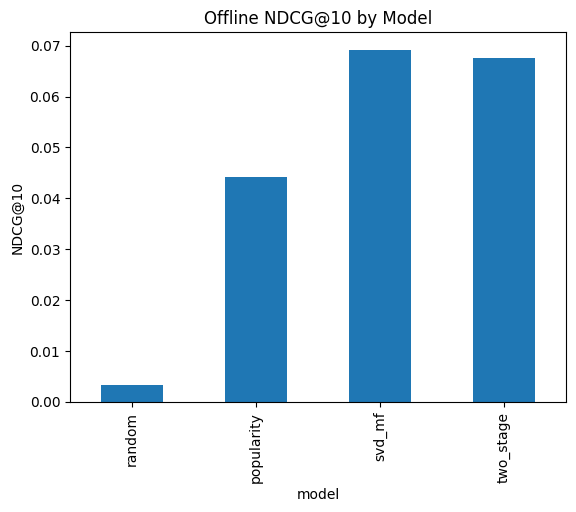

In [6]:
import matplotlib.pyplot as plt

results_df.set_index("model")[f"ndcg@{K}"].plot(kind="bar")
plt.ylabel(f"NDCG@{K}")
plt.title(f"Offline NDCG@{K} by Model")
plt.show()